In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import sys
sys.path.append('/home/matthieu/Dev/openai/reinforcement_learning')
                
import numpy as np

from dqn.environment import ProcessedEnvironnement
from dqn.agent import DQNAgent
from dqn.convnet import ConvNet
from dqn.history import History

from ipywidgets import interact

Using TensorFlow backend.


In [2]:
env = ProcessedEnvironnement(
    'SpaceInvaders-v0', 
    outdir='/home/matthieu/temp/random-agent-results', 
    wrappers_cond=False
)
env.seed(0)

[2017-06-04 22:10:22,216] Making new env: SpaceInvaders-v0


In [3]:
weight_fname = '/home/matthieu/temp/test.h5'
use_actions = False
nbr_obs = 4
nbr_past_actions = 0
ob = env.reset()
input_shape = (ob.shape[0], ob.shape[1], nbr_obs*ob.shape[2])

network = ConvNet(
    input_shape=input_shape, nbr_action=env.action_space.n, 
    use_actions=use_actions, weight_fname=weight_fname, 
    nbr_previous_action=nbr_obs + nbr_past_actions
)

history = History(
    obs_shape=ob.shape, nbr_obs=nbr_obs, 
    nbr_past_actions=nbr_past_actions, 
    use_actions=network.use_actions, buffer_size=10
)

agent = DQNAgent(
    action_space=env.action_space, network=network,
    obs_shape=ob.shape, nbr_obs=nbr_obs,
    nbr_past_actions=nbr_past_actions, buffer_size=1000000,
    use_actions=use_actions, epsilon=0.05, decay=0.0,
    epsilon_min=0.0
)

___________________________________________________________________________________________________________________
Layer (type)                         Output Shape              Param #       Connected to                          
input_1 (InputLayer)                 (None, 84, 84, 4)         0                                                   
___________________________________________________________________________________________________________________
convolution2d_1 (Convolution2D)      (None, 20, 20, 32)        8224          input_1[0][0]                         
___________________________________________________________________________________________________________________
activation_1 (Activation)            (None, 20, 20, 32)        0             convolution2d_1[0][0]                 
___________________________________________________________________________________________________________________
convolution2d_2 (Convolution2D)      (None, 9, 9, 64)          32832    

In [4]:
reward = 0
warm_up_counter = 0
while warm_up_counter < 5000:
    print(warm_up_counter)
    ob = env.reset()
    done = True
    while True:
        action = agent.act(
            ob, reward, done, random=True, 
            no_op_max=4, no_op_action=0
        )
        ob, reward, done, _ = env.step(action)
        warm_up_counter += 1
        if done:
            break

0
695
1773
2402
3015
3681
4267
4780


In [7]:
agent.history.past_obs_original[0].shape

(84, 84, 1)

In [5]:
fontsize = 18
index = 2000


# @interact(index=2000)
def plot_history(index):
    
    print(index)
    f, axs = plt.subplots(1, 3, figsize=(20, 10))

    axs[0].imshow(agent.history.past_obs_original[index-1][..., 0], cmap='gray')
    axs[0].set_title(
        'action: {} / reward: {} / done: {}'.format(
            agent.history.past_actions[index-1],
            agent.history.past_rewards[index-1],
            agent.history.past_done[index-1]
        ),
        fontsize=fontsize
    )
    axs[1].imshow(agent.history.past_obs_original[index][..., 0], cmap='gray')
    axs[1].set_title(
        'action: {} / reward: {} / done: {}'.format(
            agent.history.past_actions[index],
            agent.history.past_rewards[index],
            agent.history.past_done[index]
        ),
        fontsize=fontsize
    )
    axs[2].imshow(agent.history.past_obs_original[index+1][..., 0], cmap='gray')
    axs[2].set_title(
        'action: {} / reward: {} / done: {}'.format(
            agent.history.past_actions[index+1],
            agent.history.past_rewards[index+1],
            agent.history.past_done[index+1]
        ),
        fontsize=fontsize
    )
    plt.show()

100


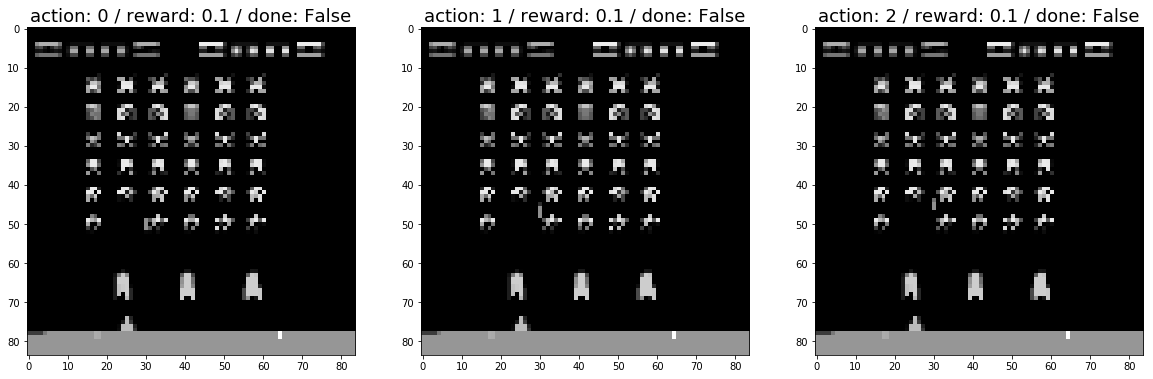

In [6]:
plot_history(100)

In [ ]:
plot_history(1000)

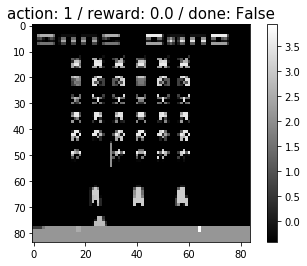

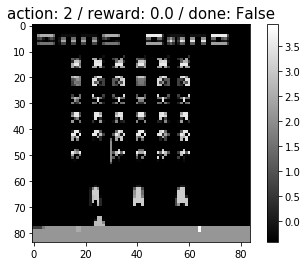

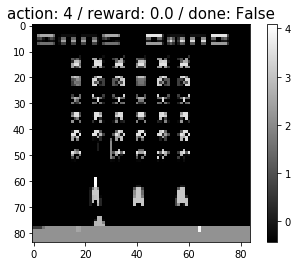

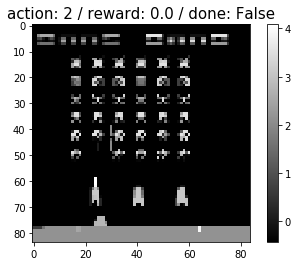

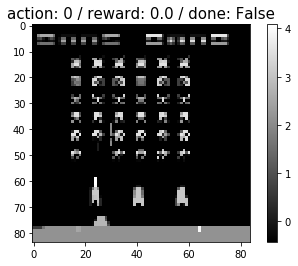

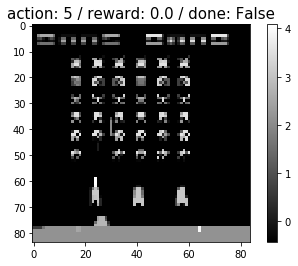

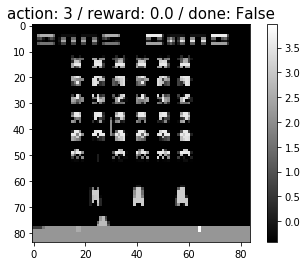

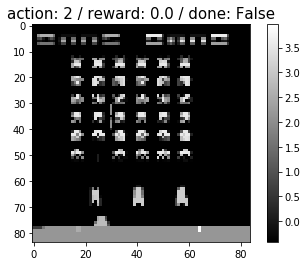

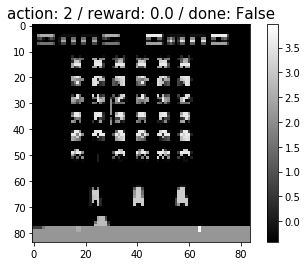

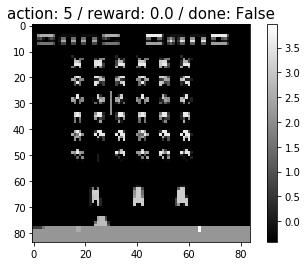

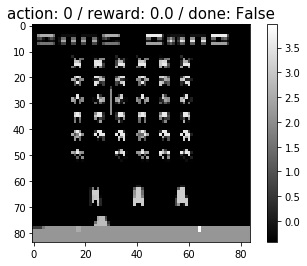

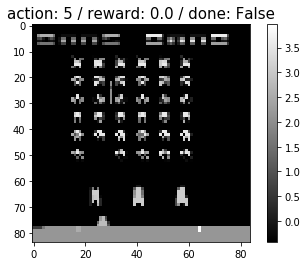

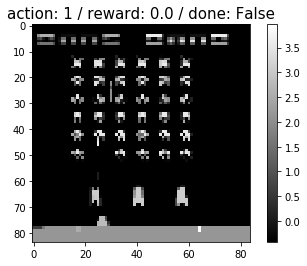

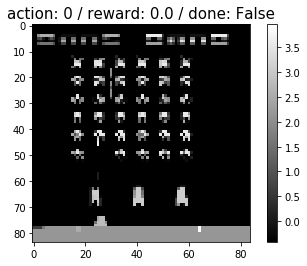

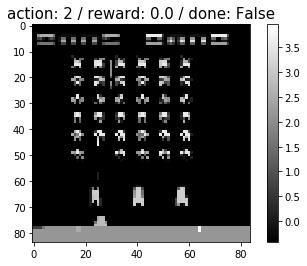

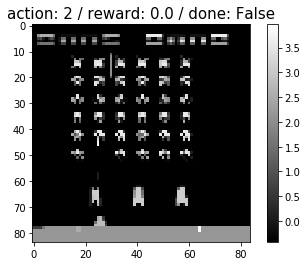

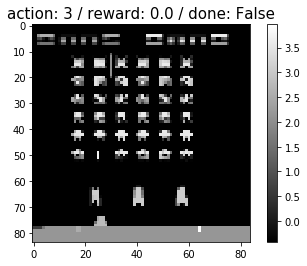

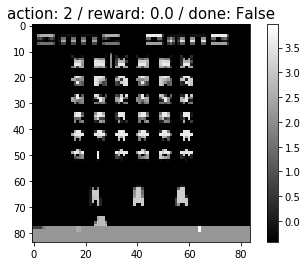

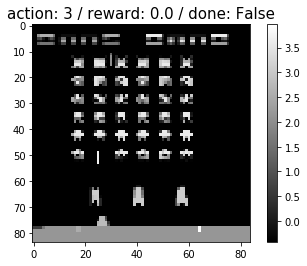

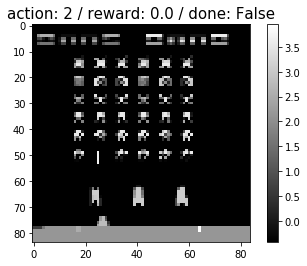

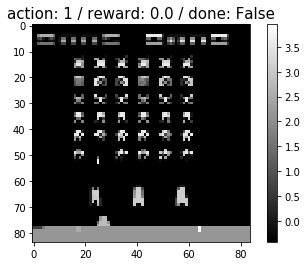

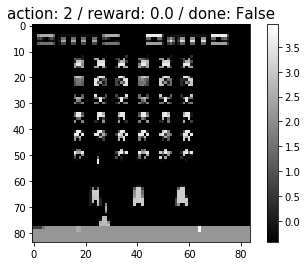

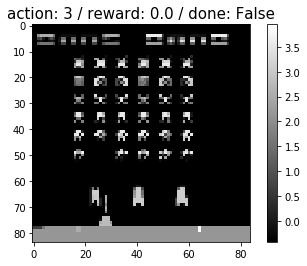

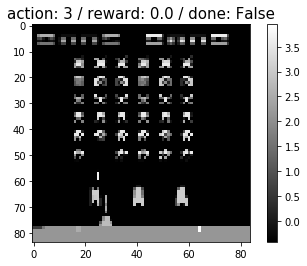

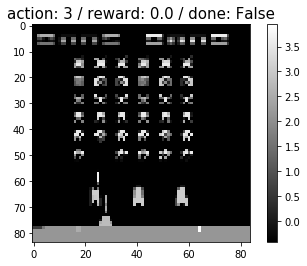

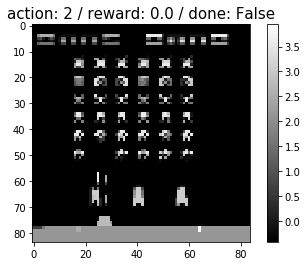

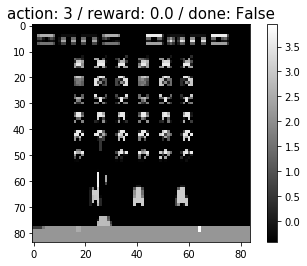

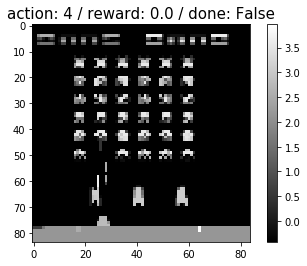

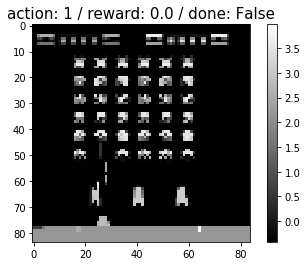

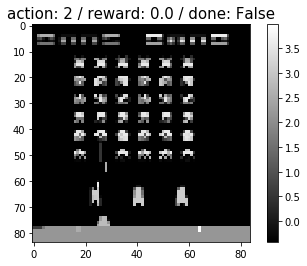

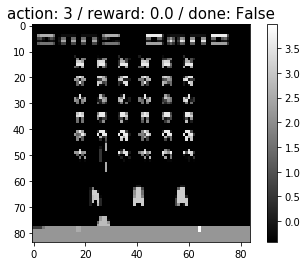

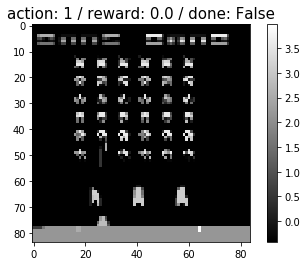

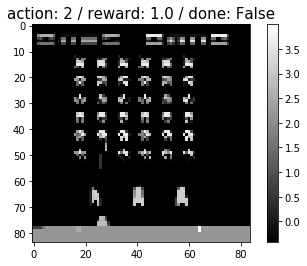

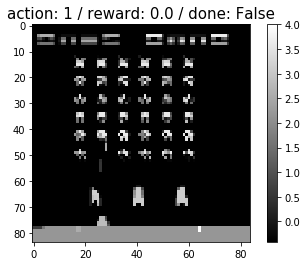

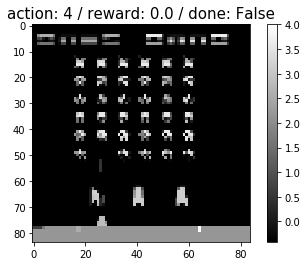

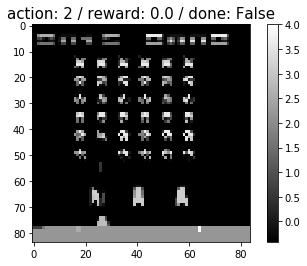

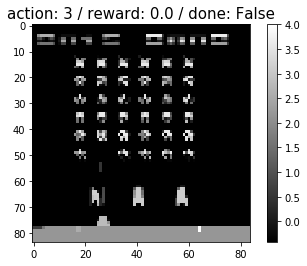

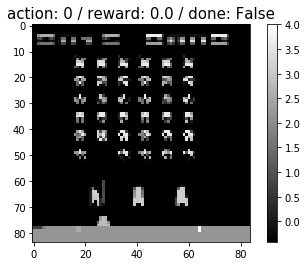

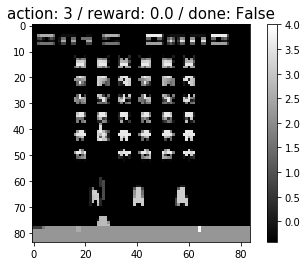

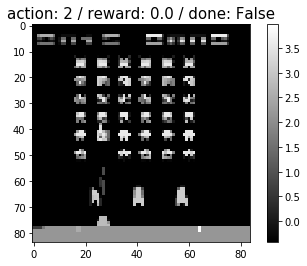

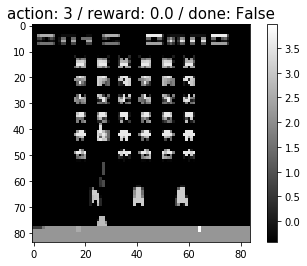

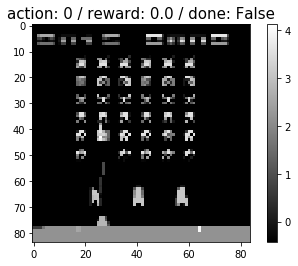

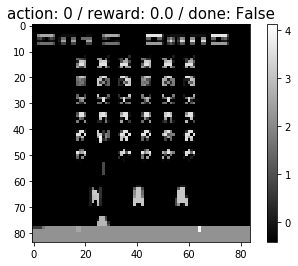

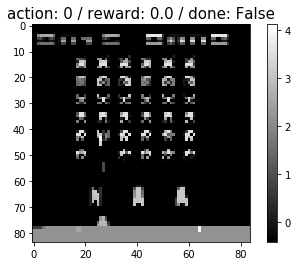

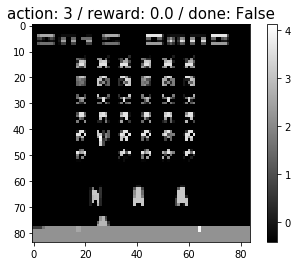

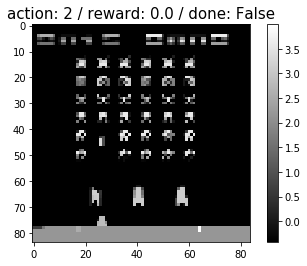

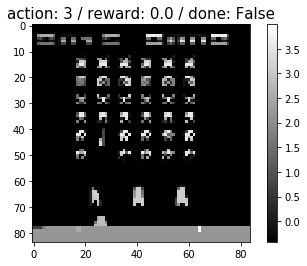

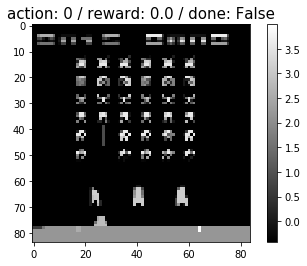

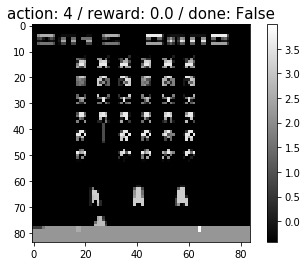

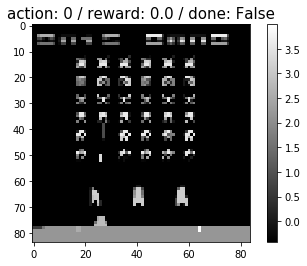

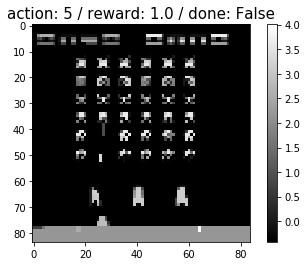

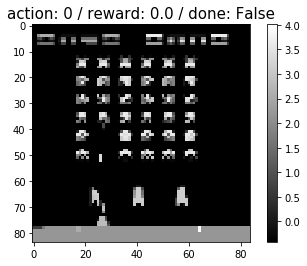

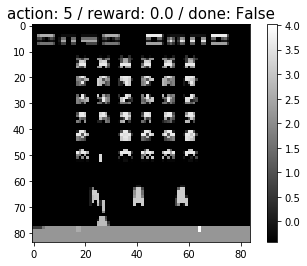

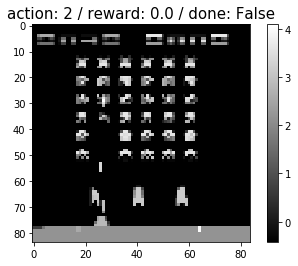

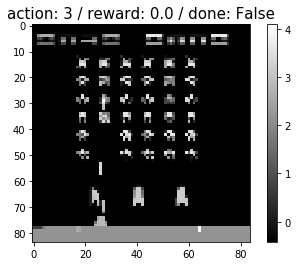

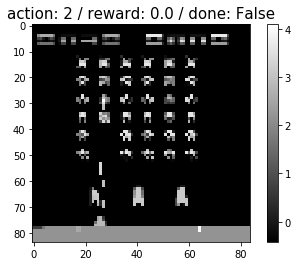

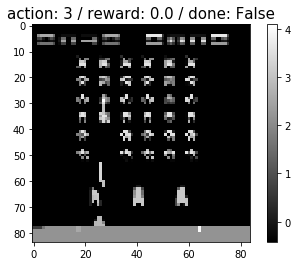

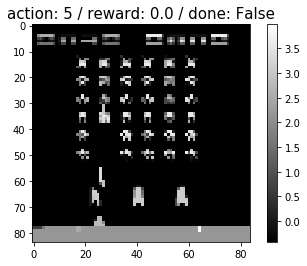

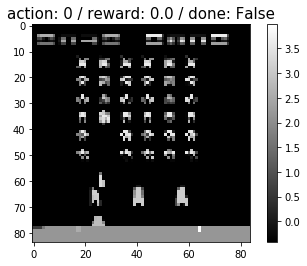

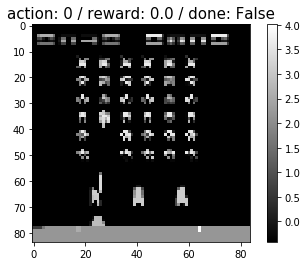

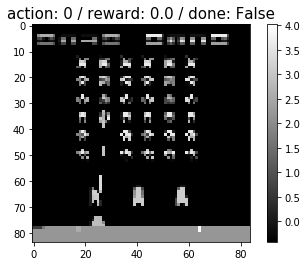

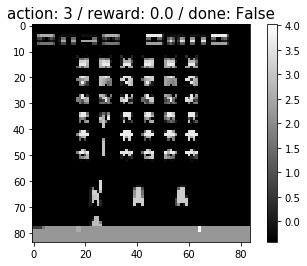

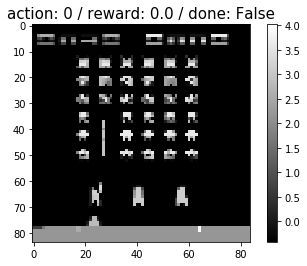

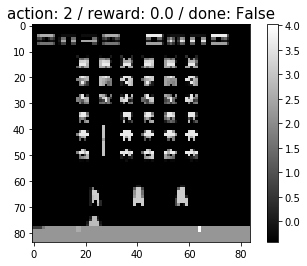

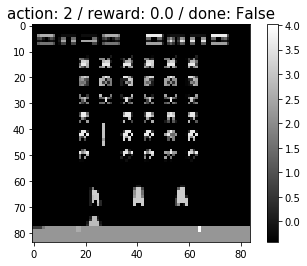

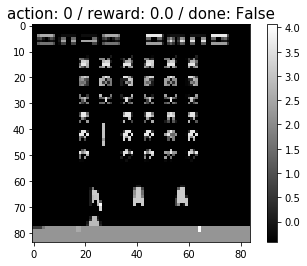

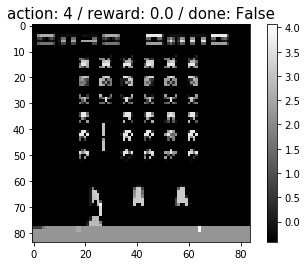

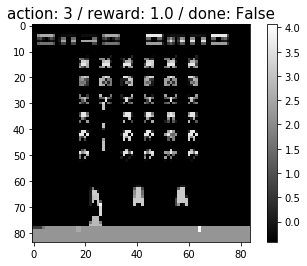

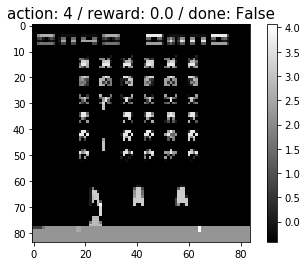

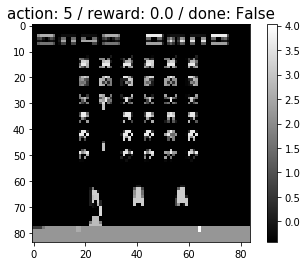

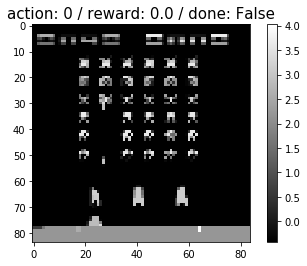

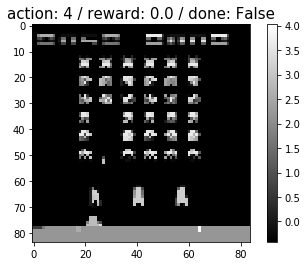

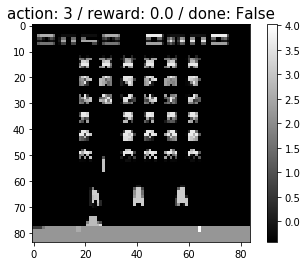

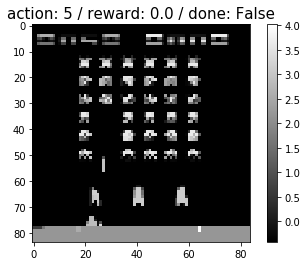

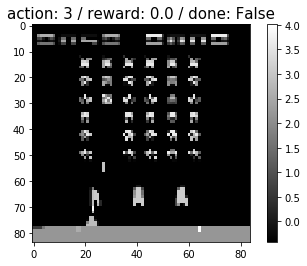

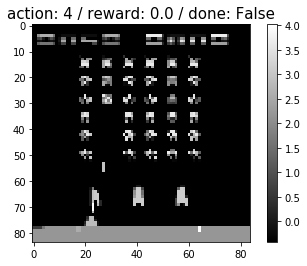

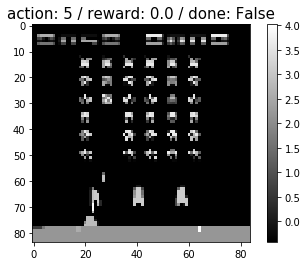

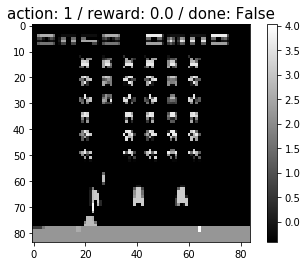

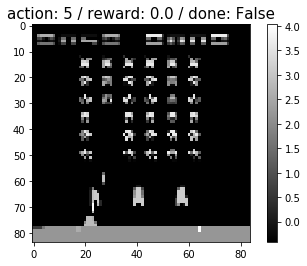

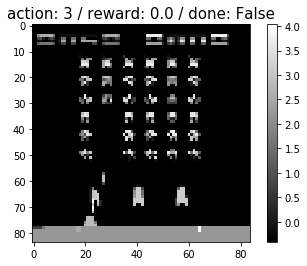

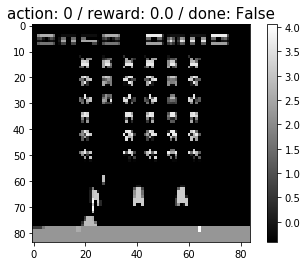

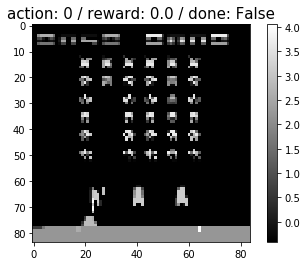

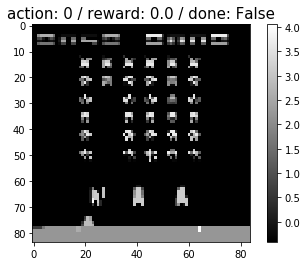

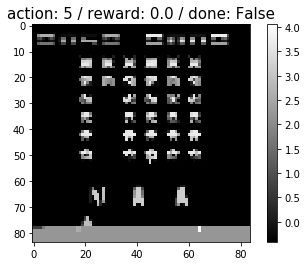

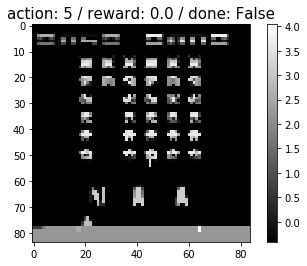

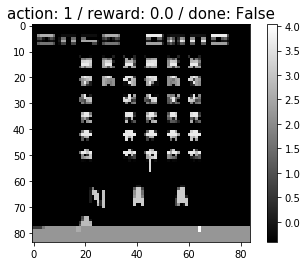

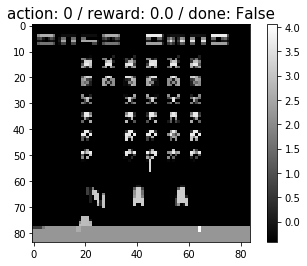

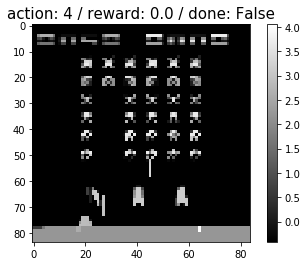

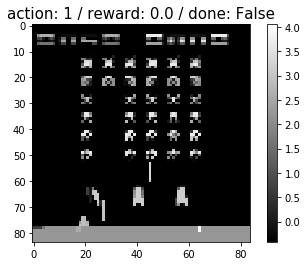

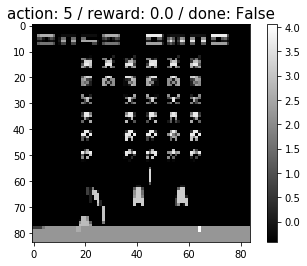

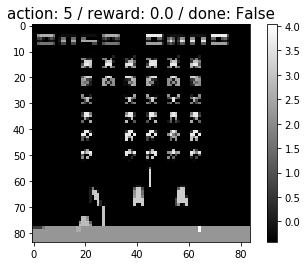

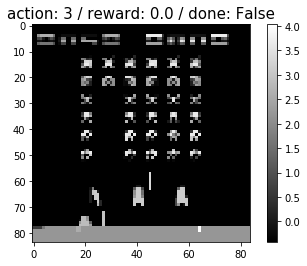

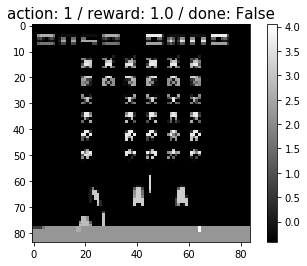

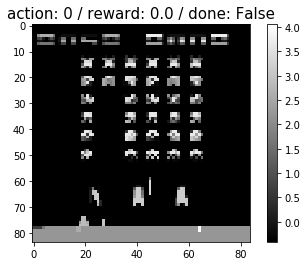

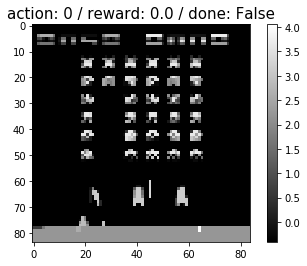

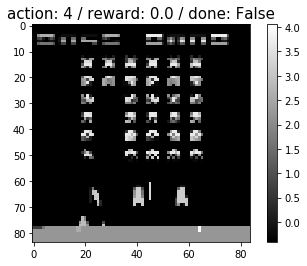

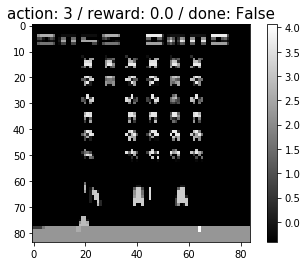

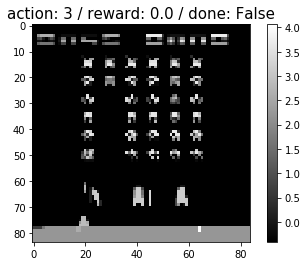

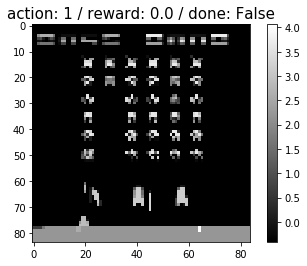

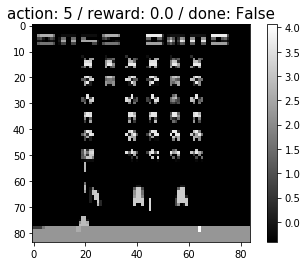

In [11]:
fontsize=15
for index in range(100):
    plt.imshow(agent.history.past_obs[100+index][..., 0], cmap='gray')
    plt.title(
        'action: {} / reward: {} / done: {}'.format(
            agent.history.past_actions[100+index],
            agent.history.past_rewards[100+index],
            agent.history.past_done[100+index]
        ),
        fontsize=fontsize
    )
    plt.colorbar()
    plt.show()

In [11]:
for index in range(1000):
    print(np.min(agent.history.past_obs[100+index][..., 0]))

-0.422636514059
-0.422594902202
-0.422594902202
-0.422594902202
-0.422331423959
-0.422331423959
-0.418039262986
-0.418039262986
-0.418039262986
-0.418039262986
-0.418432364507
-0.418432364507
-0.418221014388
-0.418221014388
-0.418221014388
-0.418221014388
-0.418499516429
-0.418499516429
-0.418596477556
-0.422128186425
-0.422128186425
-0.422128186425
-0.422128186425
-0.422345456248
-0.422867165392
-0.422867165392
-0.422867165392
-0.418767428868
-0.418123125579
-0.418123125579
-0.418123125579
-0.418123125579
-0.416052447127
-0.416052447127
-0.416052447127
-0.416052447127
-0.416707542928
-0.416824681207
-0.416824681207
-0.418382004321
-0.418394862815
-0.421820282446
-0.419762250699
-0.41937895159
-0.419209011676
-0.418874572938
-0.418874572938
-0.418874572938
-0.418805629393
-0.418805629393
-0.418805629393
-0.416505815661
-0.41594916949
-0.41594916949
-0.41594916949
-0.41594916949
-0.416754160029
-0.417540638636
-0.417243524623
-0.41496007908
-0.414314851283
-0.414314851283
-0.41431485128

-0.41627880031
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.413528662656
-0.408366133971
-0.408140703631
-0.407566138758
-0.407566138758
-0.407566138758
-0.407566138758
-0.407676979988
-0.407676979988
-0.407676979988
-0.407504008836
-0.407504008836
-0.407504008836
-0.407504008836
-0.407730759957
-0.412039746387
-0.412039746387
-0.412370568701
-0.412370568701
-0.412516361936
-0.412641828061
-0.412852822214
-0.412852822214
-0.408538685241
-0.40849167632
-0.408068456335
-0.408068456335
-0.408068456335
-0.407834567923
-0.406862975072
-0.406862975072
-0.406862975072
-0.406862975072
-0.406946784362
-0.407492582216
-0.40766952543
-0.40766952543
-0.412282895415
-0.412282895415
-0.412282895415
-0.412282895415
-0.412543310326
-0.412543310326
-0.412543310326
-0.412543310326
-0.412243335345
-0.412243335345
-0.407259234819
-0.407259234819
-0.407259234

In [15]:
agent.history.past_done[:10]

[True, False, False, False, False, False, False, False, False, False]

In [2]:
from dqn.trainer import DQNLearning

In [3]:
dqlearning = DQNLearning(
    weight_fname='/home/matthieu/temp/test.h5',
    use_actions=False, nbr_past_actions=0, nbr_obs=4,
    env_id='SpaceInvaders-v0', episode_count=0,
    update_freq=10000, buffer_size=100000, batch_size=32,
    decay=1e-6
)
dqlearning.train()

[2017-06-02 03:17:41,945] Making new env: SpaceInvaders-v0


___________________________________________________________________________________________________________________
Layer (type)                         Output Shape              Param #       Connected to                          
input_1 (InputLayer)                 (None, 84, 84, 4)         0                                                   
___________________________________________________________________________________________________________________
convolution2d_1 (Convolution2D)      (None, 84, 84, 64)        6464          input_1[0][0]                         
___________________________________________________________________________________________________________________
batchnormalization_1 (BatchNormaliza (None, 84, 84, 64)        256           convolution2d_1[0][0]                 
___________________________________________________________________________________________________________________
activation_1 (Activation)            (None, 84, 84, 64)        0        

___________________________________________________________________________________________________________________
Layer (type)                         Output Shape              Param #       Connected to                          
input_2 (InputLayer)                 (None, 84, 84, 4)         0                                                   
___________________________________________________________________________________________________________________
convolution2d_38 (Convolution2D)     (None, 84, 84, 64)        6464          input_2[0][0]                         
___________________________________________________________________________________________________________________
batchnormalization_50 (BatchNormaliz (None, 84, 84, 64)        256           convolution2d_38[0][0]                
___________________________________________________________________________________________________________________
activation_28 (Activation)           (None, 84, 84, 64)        0        

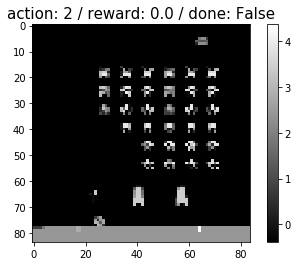

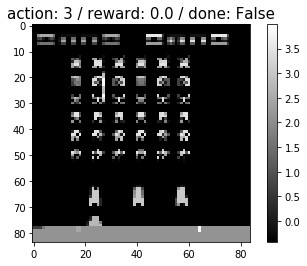

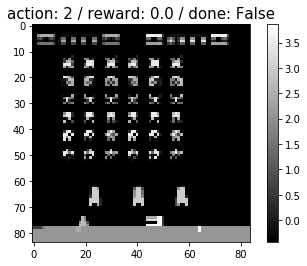

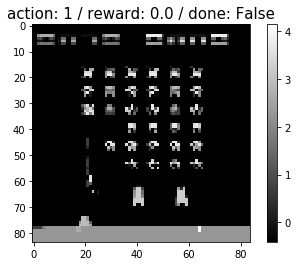

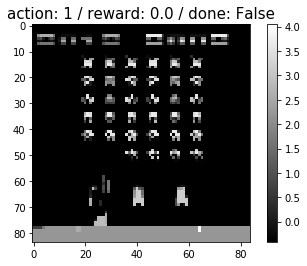

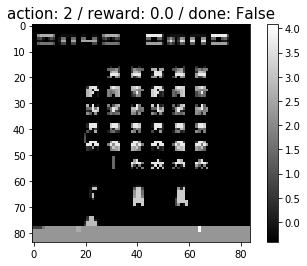

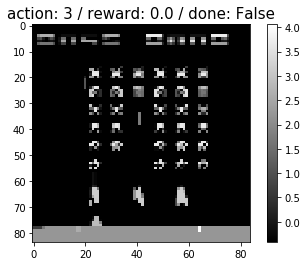

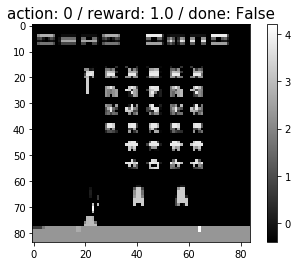

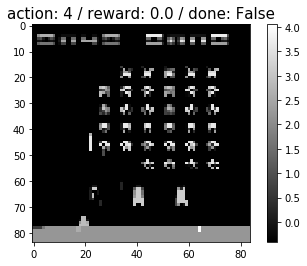

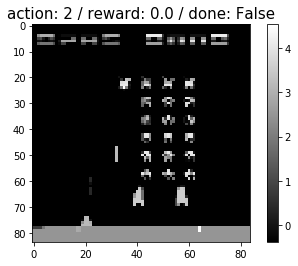

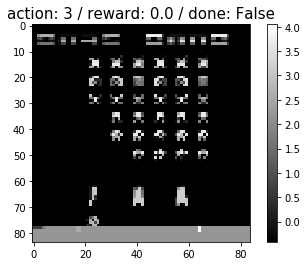

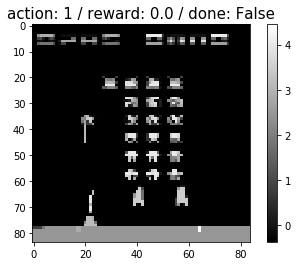

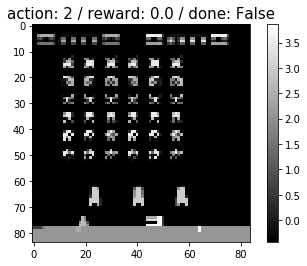

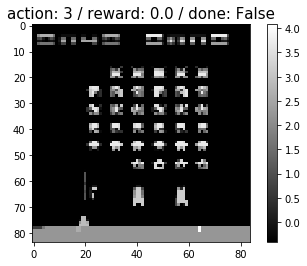

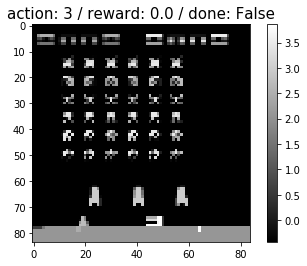

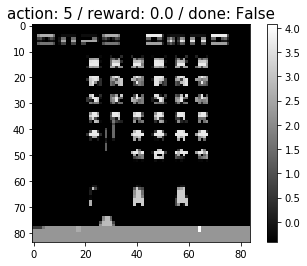

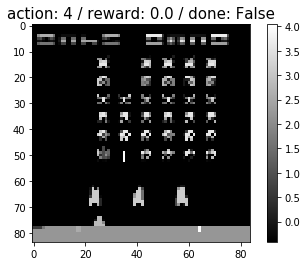

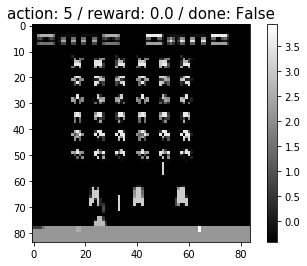

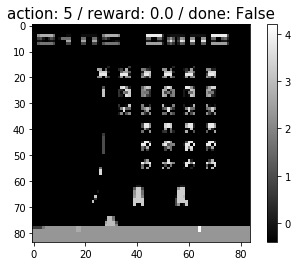

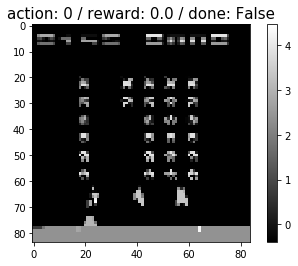

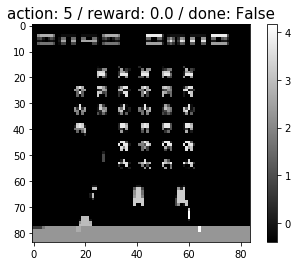

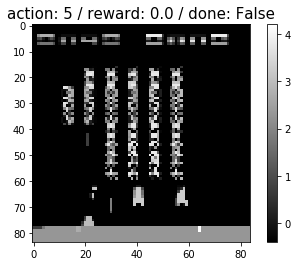

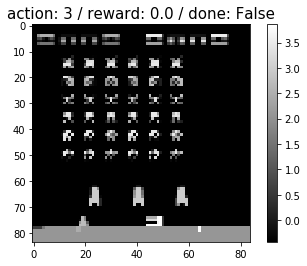

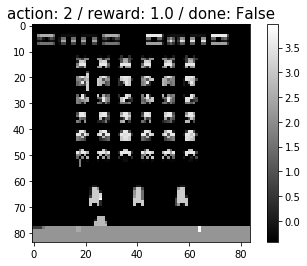

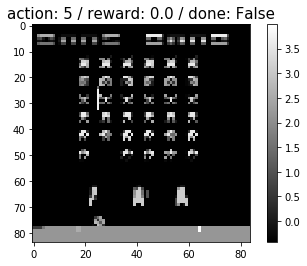

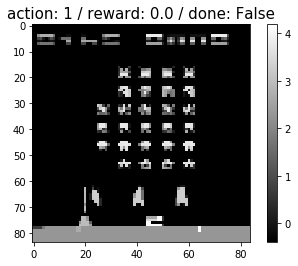

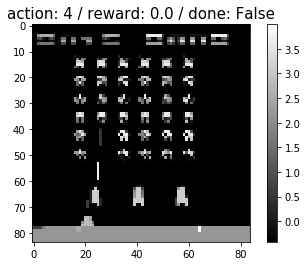

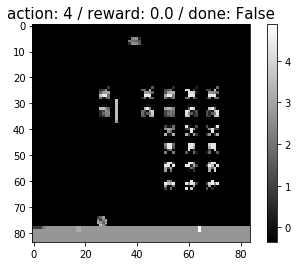

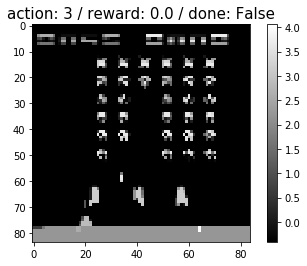

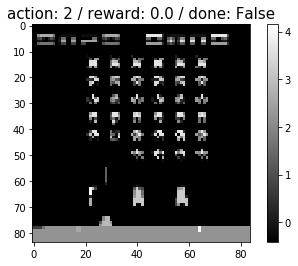

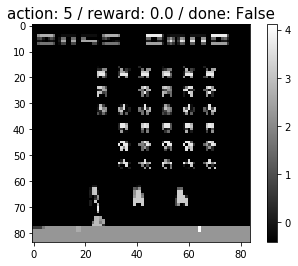

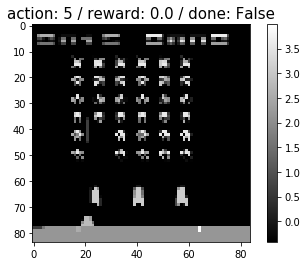

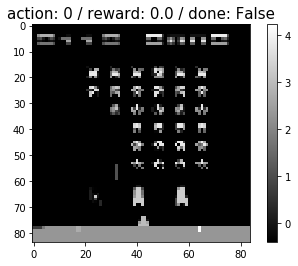

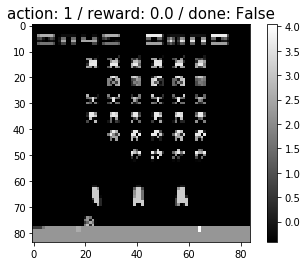

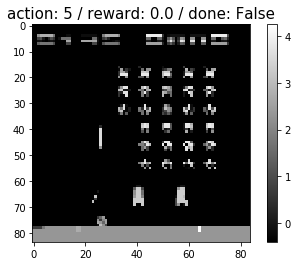

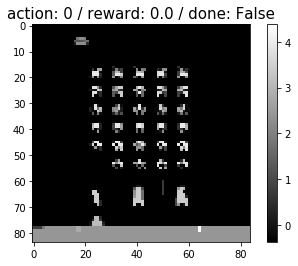

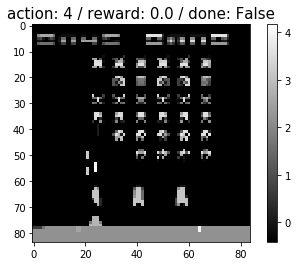

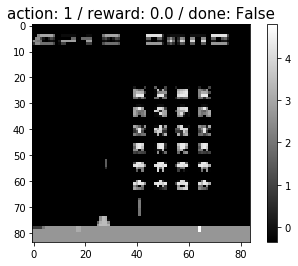

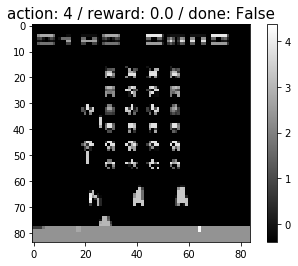

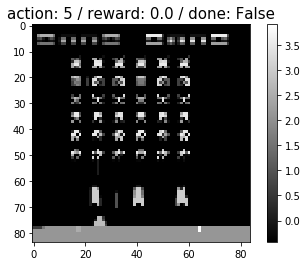

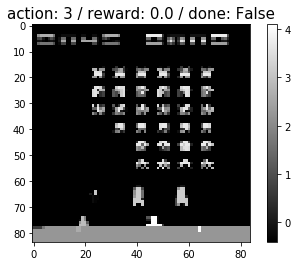

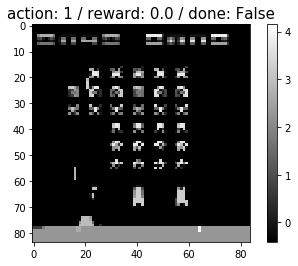

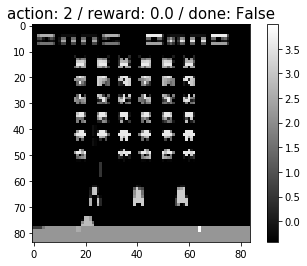

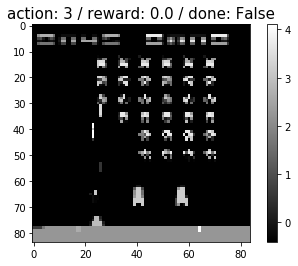

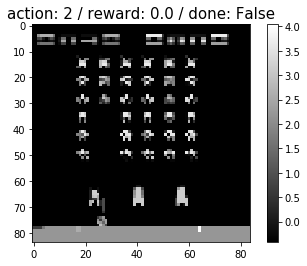

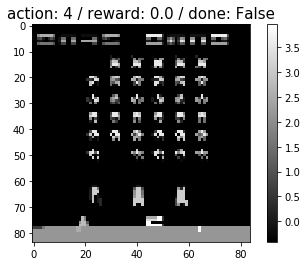

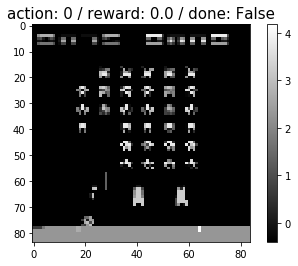

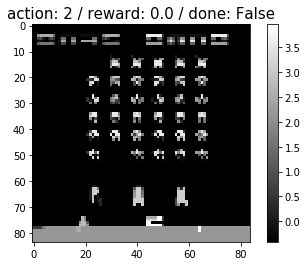

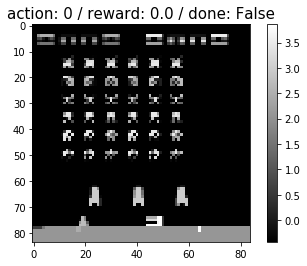

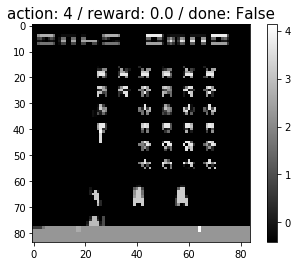

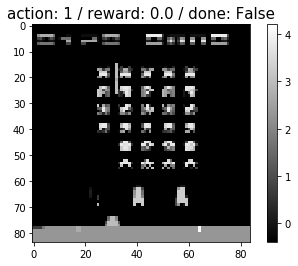

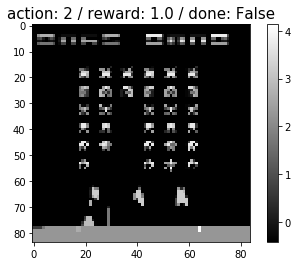

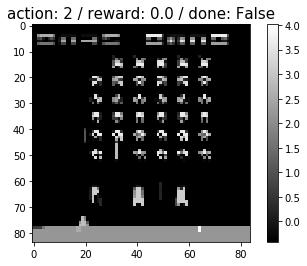

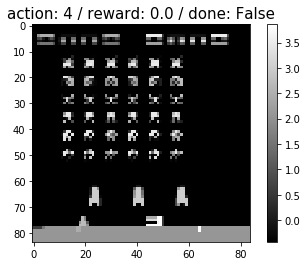

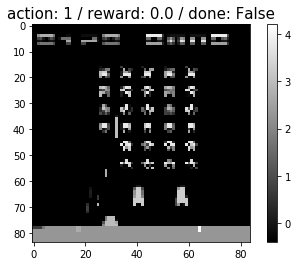

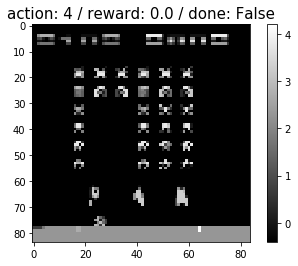

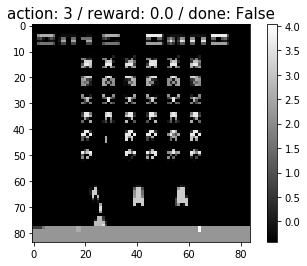

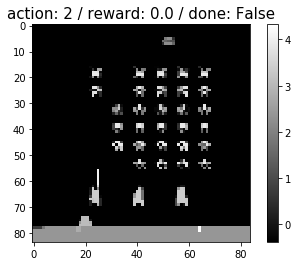

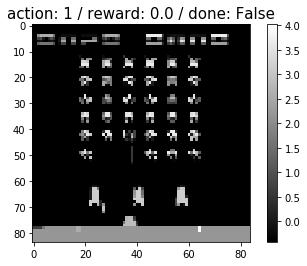

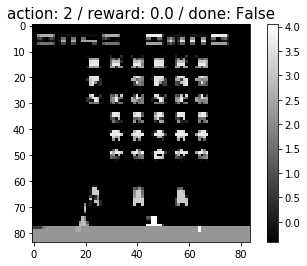

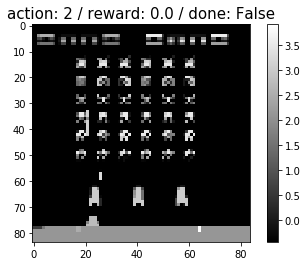

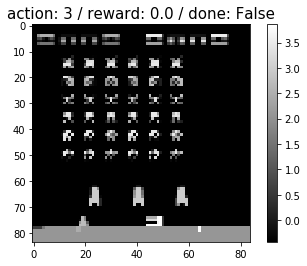

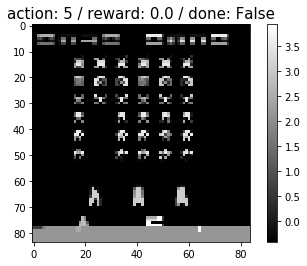

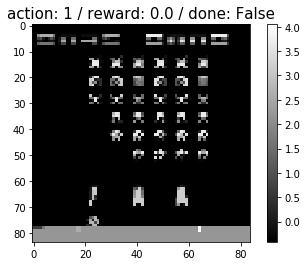

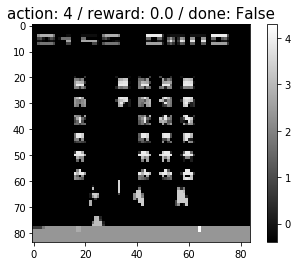

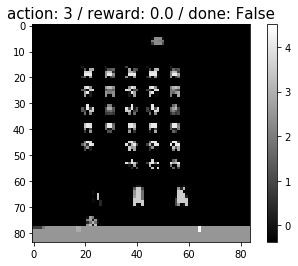

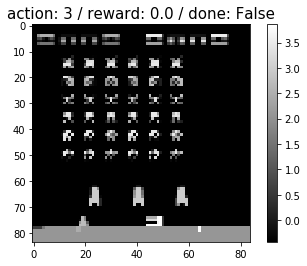

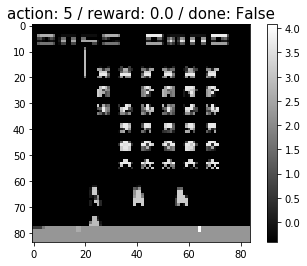

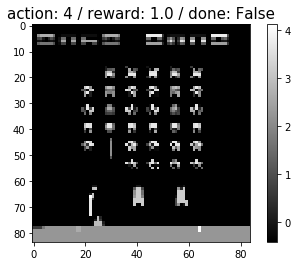

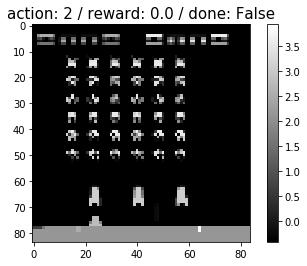

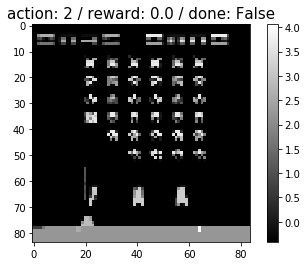

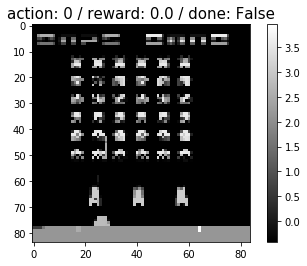

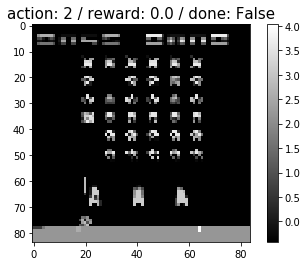

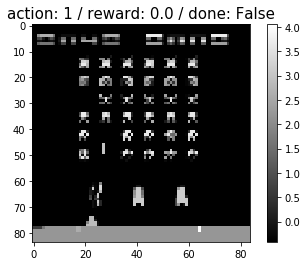

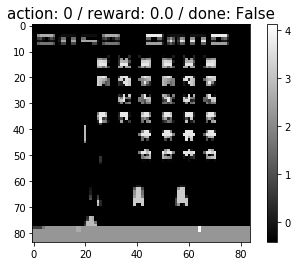

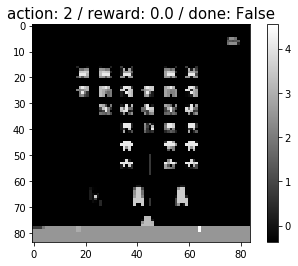

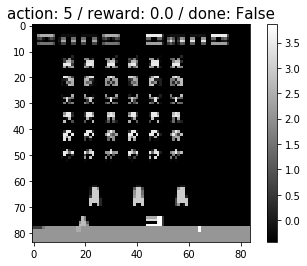

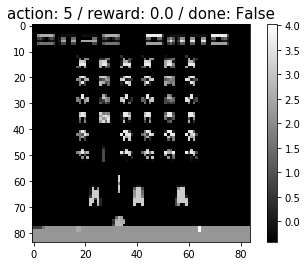

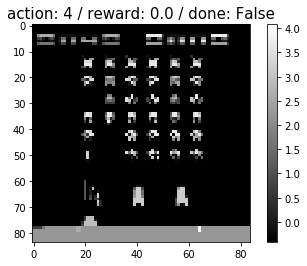

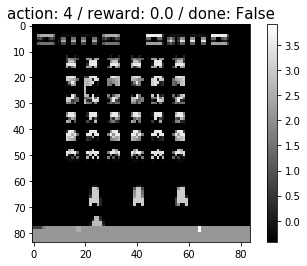

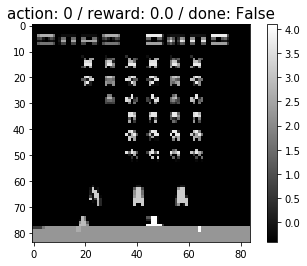

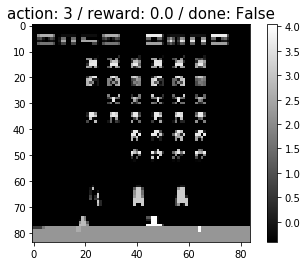

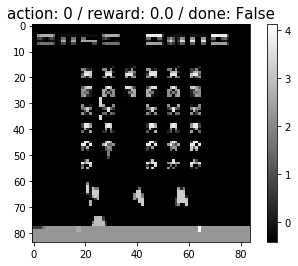

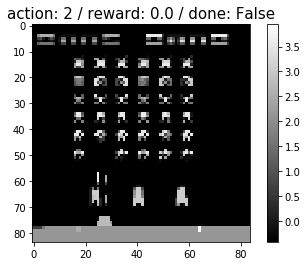

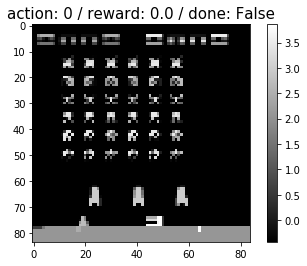

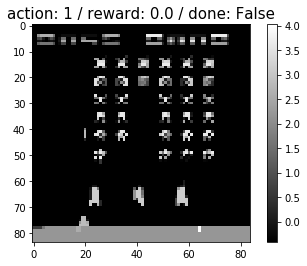

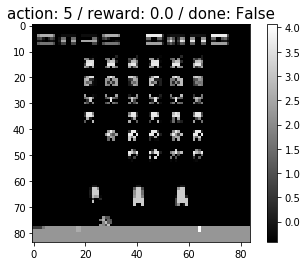

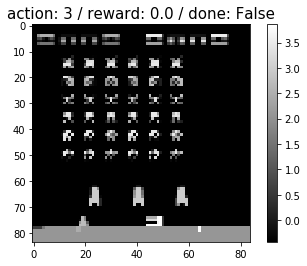

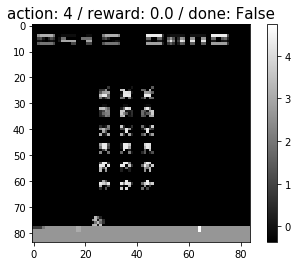

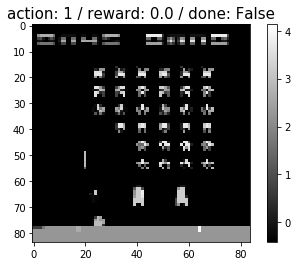

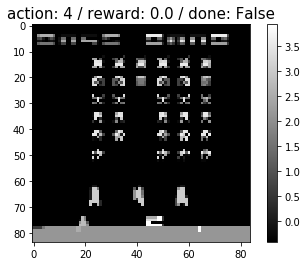

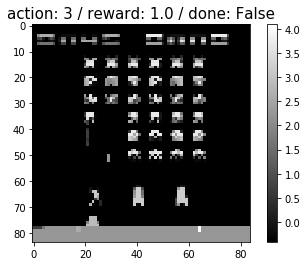

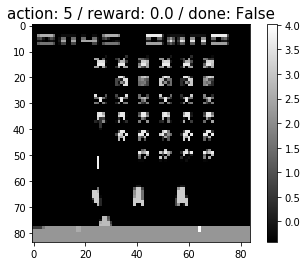

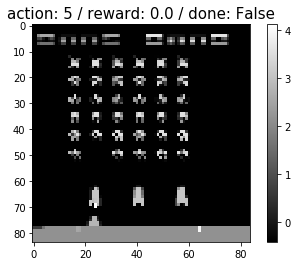

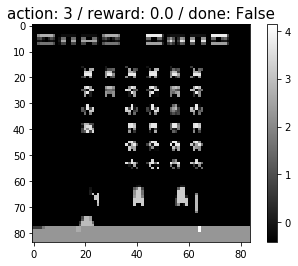

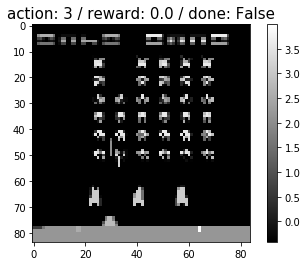

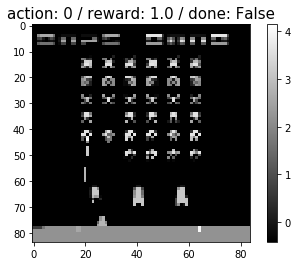

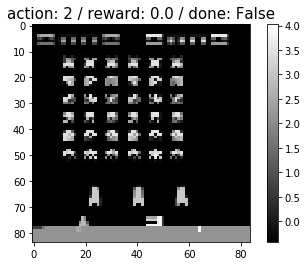

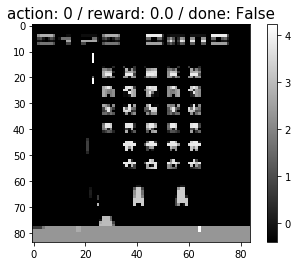

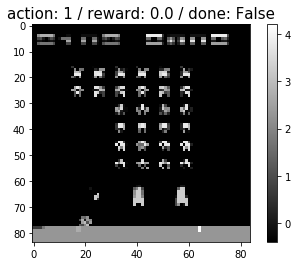

In [14]:
fontsize=15
for index in np.random.choice(np.arange(10000), size=100):
    plt.imshow(dqlearning.agent.history.past_obs[100+index][..., 0], cmap='gray')
    plt.title(
        'action: {} / reward: {} / done: {}'.format(
            dqlearning.agent.history.past_actions[100+index],
            dqlearning.agent.history.past_rewards[100+index],
            dqlearning.agent.history.past_done[100+index]
        ),
        fontsize=fontsize
    )
    plt.colorbar()
    plt.show()

(array([ 50202.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    647.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

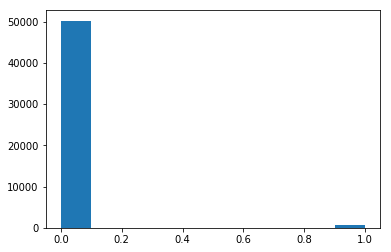

In [20]:
plt.hist(dqlearning.agent.history.past_rewards)

In [19]:
np.sum([i==False for i in dqlearning.agent.history.past_done])

50779